# Porject : Iris - Classification of flowers 

## Goal : To analysis is to investigate the relationship between sepal and petal dimensions and Iris flower species classification.

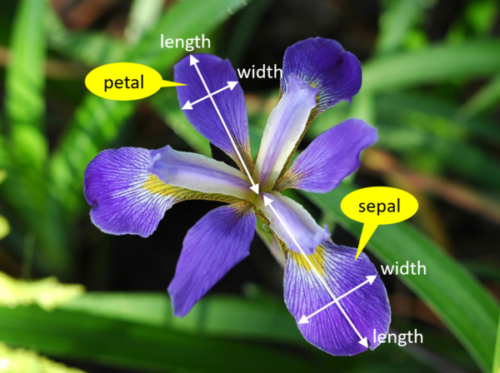

### Objectives:


### (Q.1) Exploring the distribution and correlations between sepal length, sepal width, petal length, and petal width.
### (Q.2) Utilizing machine learning algorithms such as logistic regression, decision trees, and k-nearest neighbors to classify Iris flowers based on their morphological attributes.
### (Q.3)Evaluating the predictive performance of each model to determine which features (sepal length, sepal width, petal length, petal width) contribute most significantly to accurate species classification


In [2]:
import pandas as pd # for data processing, I/O csv file
import numpy as np # for linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
iris=pd.read_csv(r"C:\Users\arunr\Desktop\ABADS Batch 12\Python\Daniel\CAPSTONE Project\Iris.csv")
iris.head().T

,0,1,2,3,4
Id,1,2,3,4,5
SepalLengthCm,5.1,4.9,4.7,4.6,5.0
SepalWidthCm,3.5,3.0,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


### Data Understanding

In [33]:
print("Shape:",iris.shape)


Shape: (150, 5)


In [35]:
print("df[Columns]:")
colmn = iris.columns
for i in colmn:
    print(i)

df[Columns]:
SepalLength
SepalWidth
PetalLength
PetalWidth
Species


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Preprocessing dataset IRIS_Table 

## STEP :1  Data Cleaning : Remove Column 'Id'

In [6]:
iris.drop(columns = 'Id',inplace =True )

## Checking IRIS-Table after removing column: 'Id' 

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#  Result : Column 'Id' is successfully removed from the IRIS-Table

## STEP :2 Rename columns

In [8]:
iris.rename({'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'},axis =1,inplace = True)

### Checking info after Column Renaming

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## STEP:3 Checking for missing values

In [11]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### Result: No missing values found

## STEP :4 Checking given dataset is balanced or not :
### Get number of elements in each class.

In [12]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Dataset Description summary: 
#### There are 5 Atributes.Atribute information is listed below:
### 1. sepal width in cm
### 2. sepal length in cm
### 3. petal width in cm
### 4. petal length in cm
### 5. class : (i) Iris-setosa(50nos.)	(ii) Iris-versicolor(50nos.) (iii)Iris-virginica(50nos.)

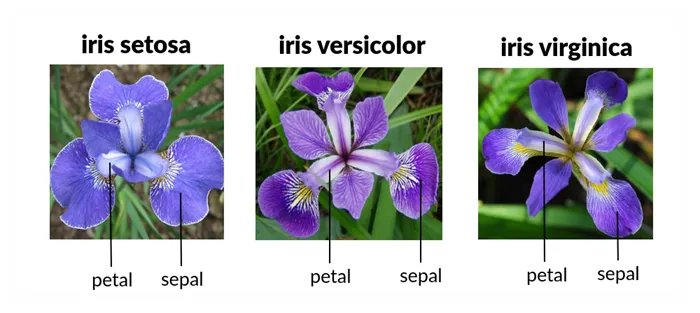

## Conclusion: 
### (1)IRIS dataset is a balanced dataset 
### (2)Each class label having 50 data points each.

## Data Visualization:
### (A) BOX PLOT

<Axes: title={'center': 'BOXPLOT - IRIS DATASET'}>

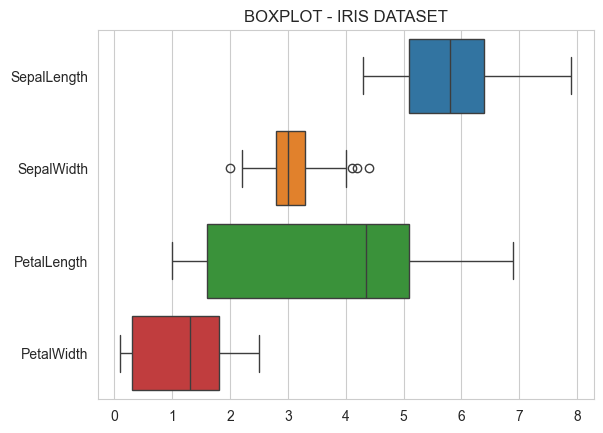

In [29]:
plt.title('BOXPLOT - IRIS DATASET')
sns.boxplot(data = iris,orient = 'h')

### (B)2D Pairplot

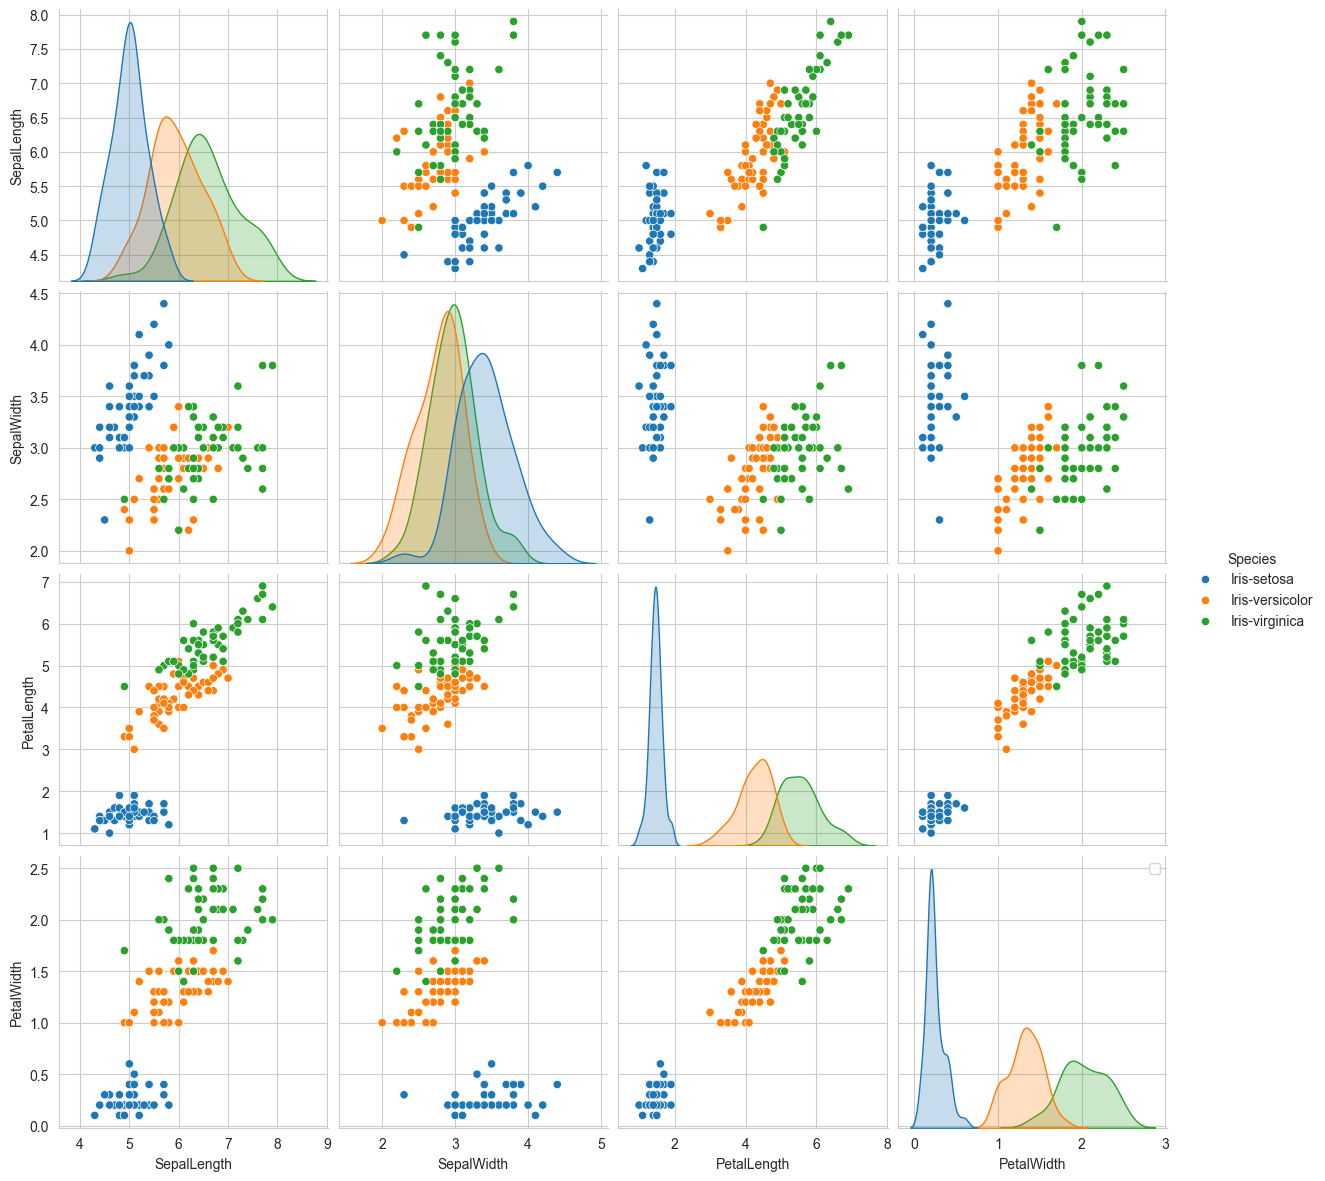

In [14]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='Species',size =3)
plt.legend()
plt.show()

# (Q.1) Exploring the distribution and correlations between sepal length, sepal width, petal length, and petal width.

## Distribution Plot

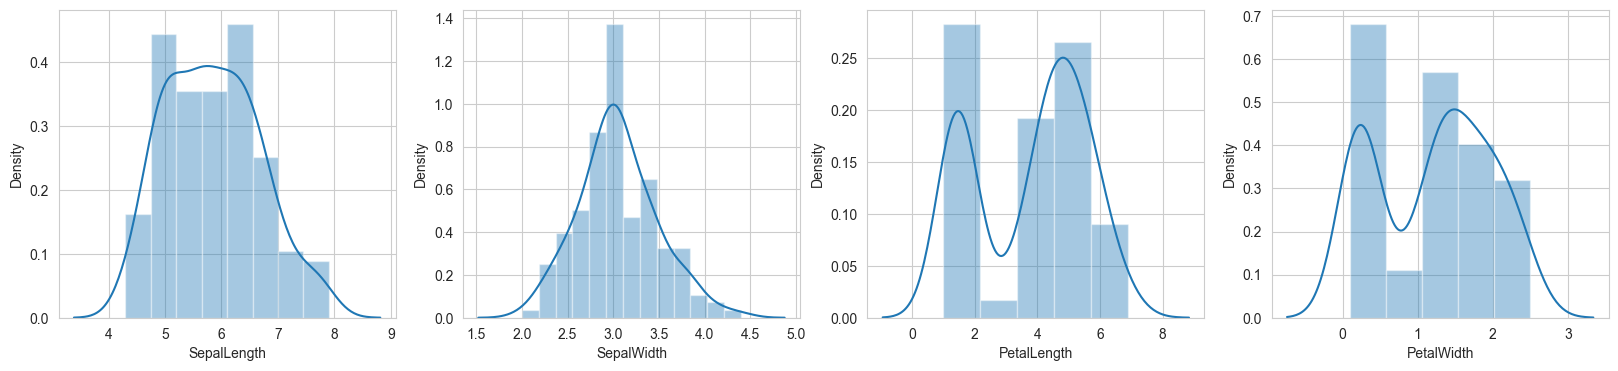

In [15]:
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
fig = plt.figure(figsize=(20,4))
i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.distplot(iris[col])
    i+=1
plt.show()

# Observation:
### SepalLength : Maximum distribution is around 5 to 6.5
### SepalWidth : Maximum distribution is around 3
### PetalLength : Maximum distribution is around 5
### PetalWidth : Maximum distribution is around 1.5

## Data Visualization:
### (A) BOXPLOT:

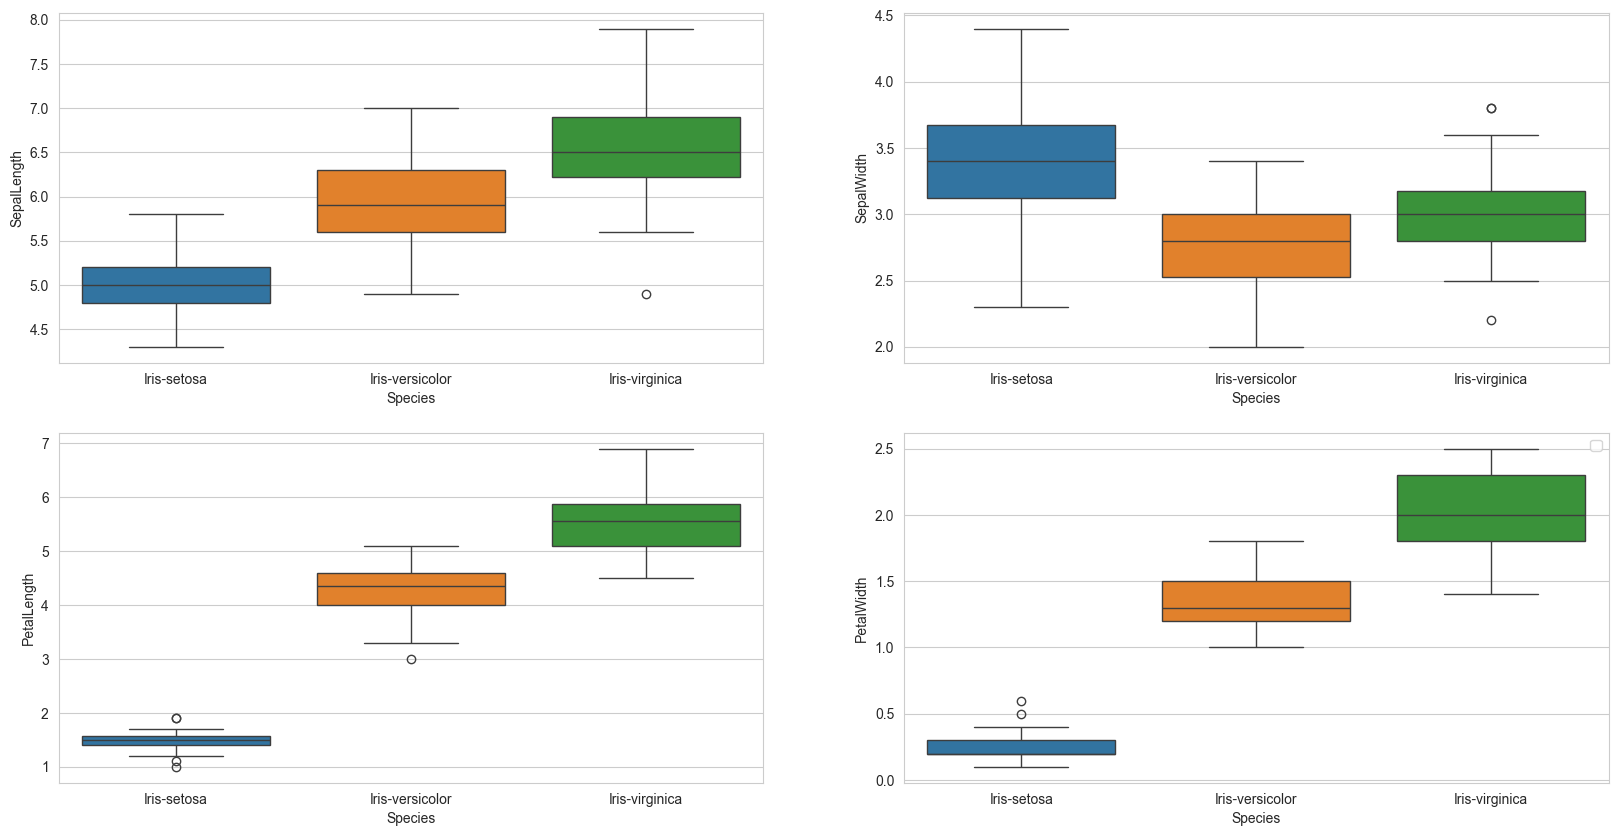

In [25]:
fig, axis = plt.subplots(2, 2, figsize=(20,10))

sns.boxplot(x='Species', y='SepalLength', data=iris,hue ='Species', ax=axis[0,0])
sns.boxplot(x='Species', y='SepalWidth', data=iris,hue ='Species', ax=axis[0,1])
sns.boxplot(x='Species', y='PetalLength', data=iris,hue ='Species', ax=axis[1,0])
sns.boxplot(x='Species', y='PetalWidth', data=iris,hue ='Species', ax=axis[1,1])
plt.legend()
plt.show()

## (B) VIOLIN-PLOT

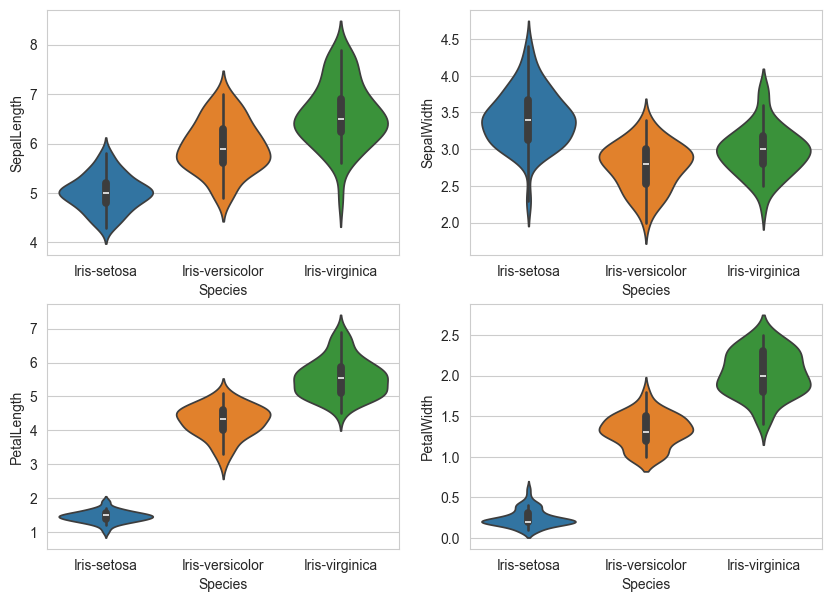

In [26]:
fig,axis =plt.subplots(2,2,figsize=(10,7))

sns.violinplot(x ='Species',y = 'SepalLength', data = iris,hue='Species', ax = axis[0,0])
sns.violinplot(x ='Species',y = 'SepalWidth', data = iris,hue='Species', ax = axis[0,1])
sns.violinplot(x ='Species',y = 'PetalLength', data = iris,hue='Species', ax = axis[1,0])
sns.violinplot(x ='Species',y = 'PetalWidth', data = iris,hue='Species', ax = axis[1,1])
plt.show()

### Result : All species can be separable. They can be classified using any of its features namely  Petal Width, Petal Length, Sepal Width & Sepal Length.

## (Q2.) Exploring by Correlation Analysis between sepal length, sepal width, petal length, and petal width?

## Correlation Analysis:
### Aim : To find any relation between the attributes

In [27]:
# Program:
df21 = iris.loc[:,'SepalLength':'PetalWidth']
df21.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


## Heatmap : Visual Plotting of Correlation Matrix 

<Axes: >

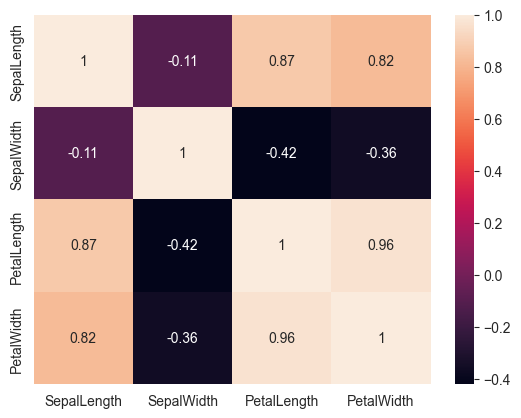

In [17]:
sns.heatmap(df21.corr(),annot=True)

## Result : Correlation values between
### 1. Petal_Width & Petal_Length  = 0.96 ---> Highest correlation value
### 2. Sepal_Length & Petal_Length = 0.87
### 3. Petal_Width & Sepal_Length  = 0.82
### 4. Petal_Width & Sepal_Width   = -0.36
### 5. Petal_Length & Sepal_Width  = -0.42 ---> Least correlation

## (Q3)Find most significant feature for classification of Species in 'Iris' dataset

### STEP 1 : - Univariate Analysis 

#### (1) Feature : PetalLength

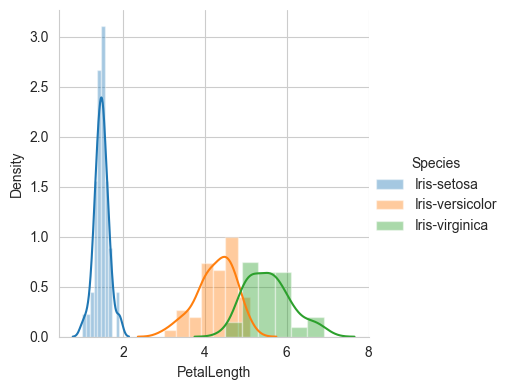

In [18]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'PetalLength').add_legend()

### Observation(Petal_Length) :

#### (i) Just using PetalLength we can separate Iris-setosa flowers easily.
#### (ii) Iris-versicolor and Iris-virginica partially seperated

### (2) Feature : PetalWidth

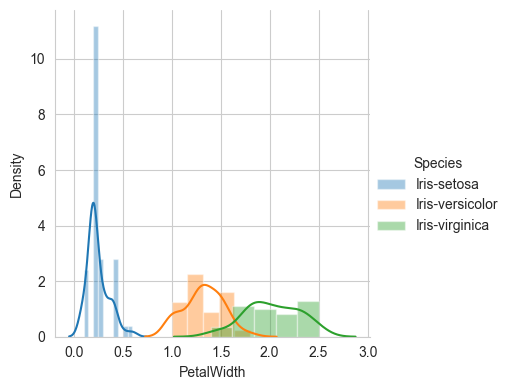

In [19]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'PetalWidth').add_legend()

### Observation(Petal Width) :
#### (i) Iris-setosa is well separable using PetalWidth
#### (ii) Iris-versicolor and Iris-virginica are partially separable using PetalWidth

### (3) Feature : SepallLength

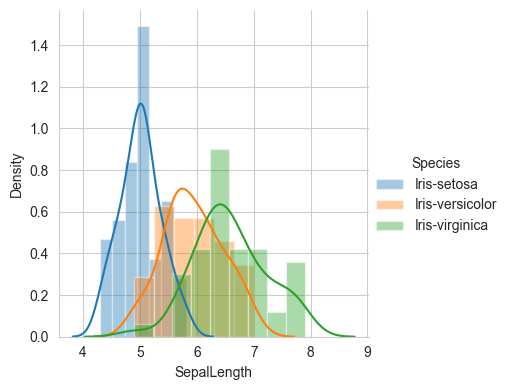

In [20]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'SepalLength').add_legend()

### Observation(Sepal Length): 
#### We cannot separate flowers just using SepalLength alone

### (4) Feature : Sepal Width

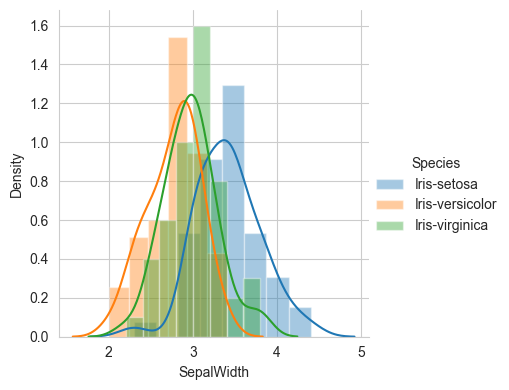

In [21]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'SepalWidth').add_legend()

### Observation on Sepal_Width:
#### We cannot separate flowers just using SepalWidth alone

## Conclusion:
### (1) No feature is perfectly separable for complete classification of Iris Dataset.
### (2) Strong correlation of (+)0.96 has been observed between Petal_Width and Petal_Length
### (3)Proceed for Bivariate Analysis btw Petal_Width and Petal_Length

## STEP 2: - BIVARIATE ANALYSIS - 
### Features : Petal Length & Petal Width 

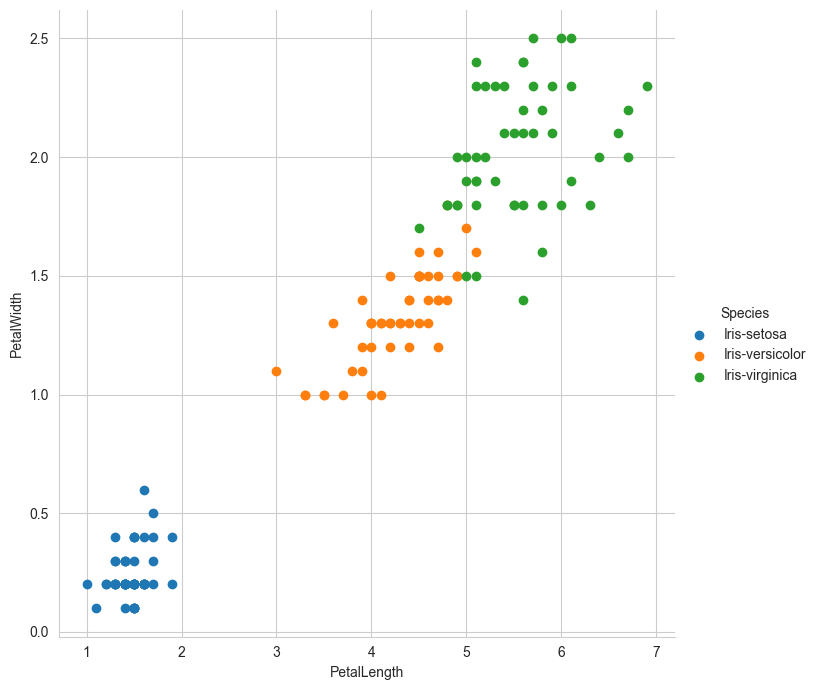

In [28]:
sns.FacetGrid(iris,hue = 'Species',height = 7).map(plt.scatter,'PetalLength','PetalWidth').add_legend()

### Bivariate Analysis was successful. 
#### Complete classification of entire 'IRIS' Dataset is shown above 


# Final Result:
## Using Petal Width and Petal Length one can separate every single species in 'IRIS' Dataset